# Metrics

This section focuses on ways to measure something numerically.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Cross-Entropy

The popularity of this metric stems from the fact that it is differentiable, making it suitable to be used as a loss function when fitting the parameters of machine learning models.

Check:
- [Cross-Entropy section at MLGlossary](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy).
- [Specific page](metrics/cross_entropy.ipynb).

Cross-entropy for $o$-th observation can be written using following formula:

$$-\sum_{c=1}^M y_{o, c} log(p_{o,c})
\\
y_{o,c} = 
\begin{cases}
1, & \text{if the } o\text{-th observation belongs to class } c, \\
0, & \text{otherwise}.
\end{cases}
$$

Where:

- $M$: number of possible classes.
- $o$: index of the observation.
- $c$: index of the class.
- $p_{o,c}$: predicted probability that object $o$ belongs to class $c$; it must satisfy all probability properties, specifically $\sum_{c=1}^M p_{o,c} = 1$.

---

Consider example estimating performance of the predicted probabilites to the array where each object belongs to one of three classes - $\{1, 2, 2, 3, 3, 1, 3\}$.

It has to be transformed into an array like $y_{o, c}$. The following cell shows the corresponding Python code.

In [3]:
array = np.array([1, 2, 2, 3, 3, 1, 3])
y = np.concatenate(
    [
        (array==i).astype(int)[None, :].T
        for i in np.sort(np.unique(array))
    ], 
    axis=1
)
y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

Now suppose we have three algorithms that return probabilities $p_{o,c}$:

In [4]:
np.random.seed(10)

def generare_preds(y: np.ndarray, factor: float):
    ans = np.random.rand(*y.shape) + y*factor
    return ans/ans.sum(axis=1, keepdims=True)

best_probs, good_probs, bad_probs = [
    generare_preds(y=y, factor=0.6)
    for factor in [0.6, 0.4, 0.1]
]

for v in [best_probs, good_probs, bad_probs]:
    display(v)

array([[0.67695441, 0.01024423, 0.31280136],
       [0.36137308, 0.53013996, 0.10848696],
       [0.11463932, 0.78747887, 0.09788181],
       [0.03796145, 0.29451329, 0.66752526],
       [0.00204705, 0.265555  , 0.73239795],
       [0.5446722 , 0.32421575, 0.13111205],
       [0.33074201, 0.2575146 , 0.41174339]])

array([[0.41470252, 0.2086117 , 0.37668579],
       [0.21103849, 0.49388948, 0.29507203],
       [0.21701083, 0.52880434, 0.25418484],
       [0.28397734, 0.18396883, 0.53205384],
       [0.24361812, 0.0690321 , 0.68734978],
       [0.4491705 , 0.52132683, 0.02950267],
       [0.24151501, 0.21116556, 0.54731942]])

array([[0.39799116, 0.42683509, 0.17517376],
       [0.29774474, 0.3534999 , 0.34875537],
       [0.21948697, 0.51583723, 0.2646758 ],
       [0.05610816, 0.49294396, 0.45094788],
       [0.13172646, 0.32382048, 0.54445306],
       [0.49503411, 0.38716011, 0.11780577],
       [0.22672704, 0.34266168, 0.43061128]])

The results of the "algorithms" are generated in such a way that there is a decrease in quality. The first and second "algorithms" have almost perfect accuracy, but the predictions of the first "algorithm" are more confident.

Here are the components of $y_{o, c} \log(p_{o,c})$:

In [5]:
for p in [best_probs, good_probs, bad_probs]:
    display(-np.log(p)*y)

array([[0.39015135, 0.        , 0.        ],
       [0.        , 0.63461423, 0.        ],
       [0.        , 0.23891875, 0.        ],
       [0.        , 0.        , 0.40417805],
       [0.        , 0.        , 0.31143127],
       [0.60757114, 0.        , 0.        ],
       [0.        , 0.        , 0.88735497]])

array([[0.88019384, 0.        , 0.        ],
       [0.        , 0.70544352, 0.        ],
       [0.        , 0.63713679, 0.        ],
       [0.        , 0.        , 0.6310106 ],
       [0.        , 0.        , 0.37491197],
       [0.80035273, 0.        , 0.        ],
       [0.        , 0.        , 0.6027227 ]])

array([[0.92132549, 0.        , 0.        ],
       [0.        , 1.03987208, 0.        ],
       [0.        , 0.66196401, 0.        ],
       [0.        , 0.        , 0.79640352],
       [0.        , 0.        , 0.60797354],
       [0.7031286 , 0.        , 0.        ],
       [0.        , 0.        , 0.84254951]])

It's interesting that only the predictions for $y_{o,c}$ play a role; more confident predictions generate less cross-entropy for that observation.

And just to be sure, let's compute the average cross-entropy for the entire sample:

In [6]:
for p in [best_probs, good_probs, bad_probs]:
    display(np.sum(-np.log(p)*y, axis=1, keepdims=True).mean())

np.float64(0.49631710718508326)

np.float64(0.6616817361606729)

np.float64(0.7961738233757771)

Obviously, higher-quality algorithms received a lower score.

## Confusion matrix

Is a way to learn properties of your classification model.

Suppose we have formed some classifier. We have the following groups of observations.

- *True positive*: observations that were positive in the sample and we correctly predicted them as positive. We will denote their number as $TP$;
- *True negative*: observations that were negative in the sample and we correcrly predicted then as negative. We will denote their number as $TN$;
- *False positve*: observations that were negative in the sample, but which we then mistakenly predicted to be positive. We will denote their number as $FP$;
- *False negative*: observations that were positive in the sample, but wich we then mistakenly predicted to be negative. We will denote their number as $FN$.

So, if you put the actual value on the rows and the predicted value on the columns, you will get a confusion matrix.


| | Predicted $N$ | Predicted $P$ |
|:---|:---:|:---:|
| Actual $N$ |$TN$|$FP$ |
| Actual $P$ |$FN$|$TP$|

Find out more in the [special page](model_properties/confusion_matrix.ipynb).

## Permutation importance

To estimate features importances of the arbitrary model you can use permutation importance algorithm. The idea is to randomly change some features of the input, and estimate a change of the model's quality measure - big change means that feature was important. For more details check ["Permutation feature importance"](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance), page on sklearn.

---

The code in the following cell creates a small $X \rightarrow y$ relationship dataset, so that each next column has a greater impact on the result than the previous one.

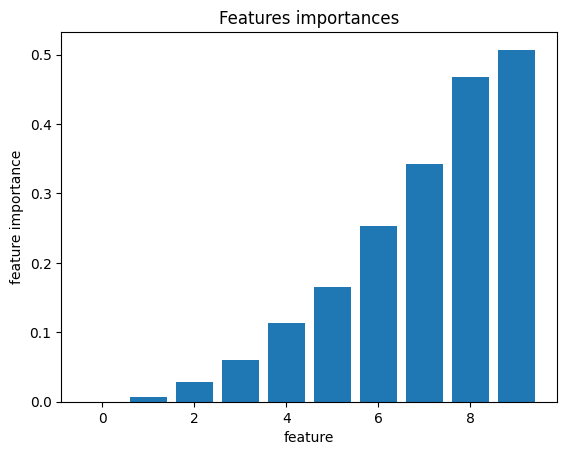

In [7]:
features_numer = 10
sample_size = 500

X = np.random.uniform(-5, 5, (sample_size, features_numer))
y = (X @ np.arange(features_numer))

model = sklearn.linear_model.LinearRegression().fit(X=X, y=y)

from sklearn.inspection import permutation_importance
importances = permutation_importance(
    estimator=model, X=X, y=y, scoring="r2"
)["importances_mean"]

plt.bar(range(importances.shape[0]), importances)
plt.xlabel("feature"), plt.ylabel("feature importance")
plt.title("Features importances")
plt.show()

As a result, other features have a greater impact on the outcome.